In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Read in the dataset
df = pd.read_csv('Pokemon.csv', index_col=0, encoding='latin')

# index_col=0  this means the first column of the dataset is the ID column

In [3]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


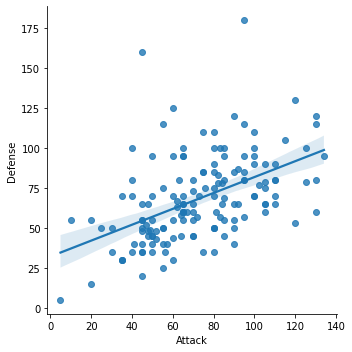

In [4]:
#compare the attack and defense stats - is there a correlation? 

sns.lmplot(x='Attack', y='Defense', data=df)

(0.0, 160.0)

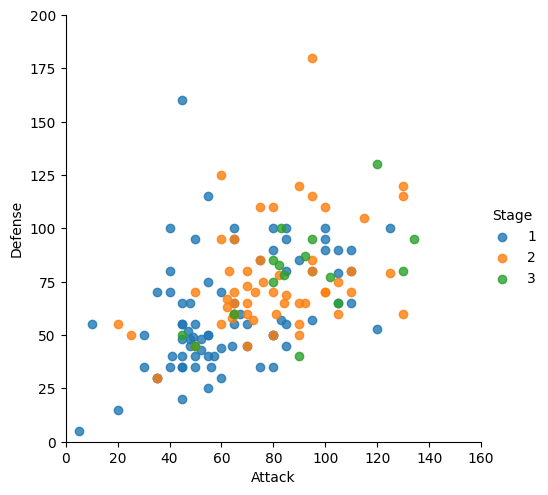

In [7]:
# Plot with seaborn
sns.lmplot(x='Attack', y='Defense', data = df, 
            fit_reg=False,  # No regression line 
            hue='Stage')    # Color by evaluation stage

# Tweak with matplotlib
plt.ylim(0,200)
plt.xlim(0,160)

<AxesSubplot:>

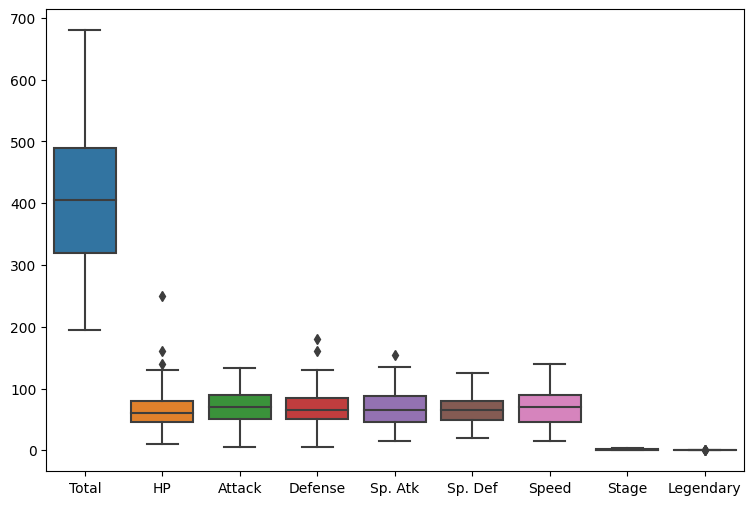

In [8]:
# Create a boxplot that shows the stats in a fixed figure size

plt.figure(figsize=(9,6))
sns.boxplot(data=df)

<AxesSubplot:>

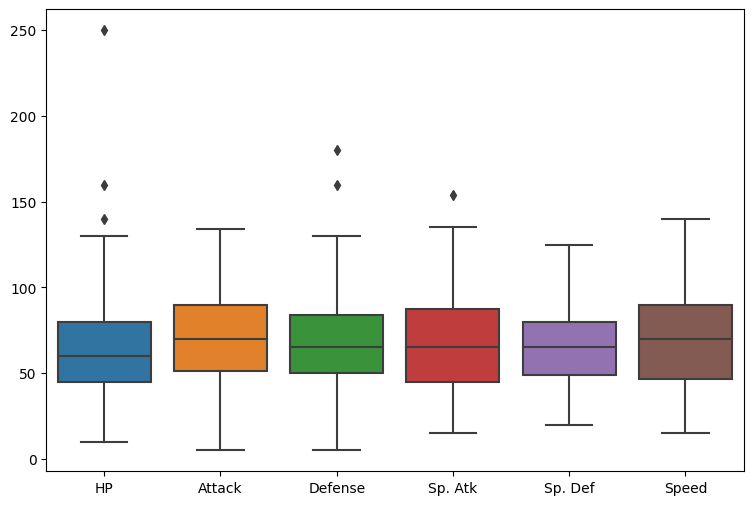

In [11]:
# Remove the aggregates...

stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)

plt.figure(figsize=(9,6)) 
sns.boxplot(data=stats_df)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

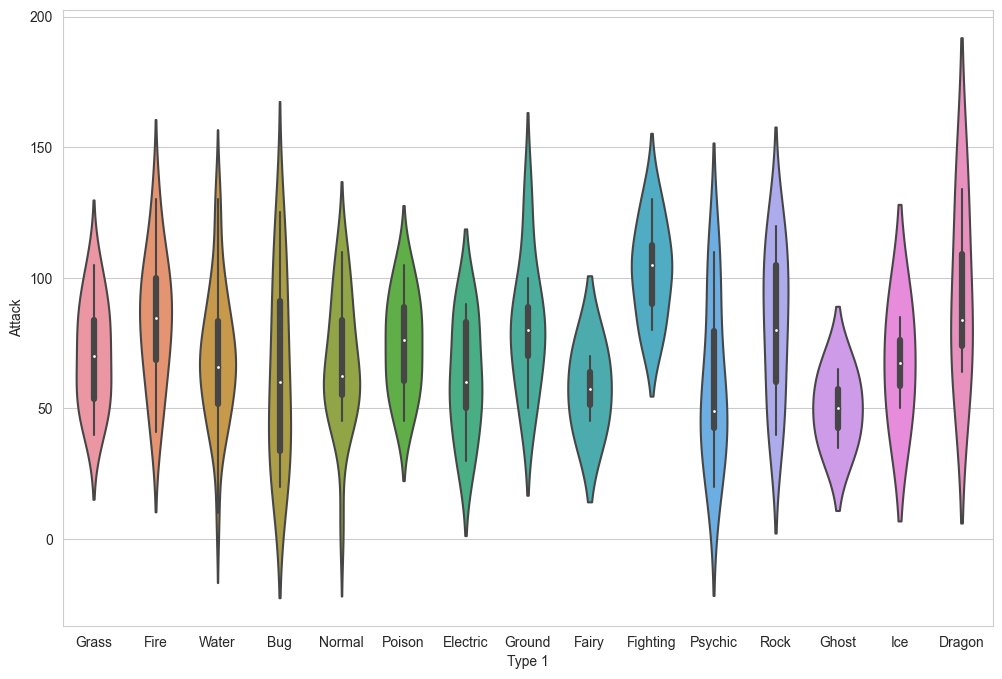

In [13]:
# Set theme
sns.set_style('whitegrid')

# Violin plots
plt.figure(figsize=(12,8))
sns.violinplot(x='Type 1', y='Attack', data=df)

In [14]:
# Customize the colors

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                    ]


<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

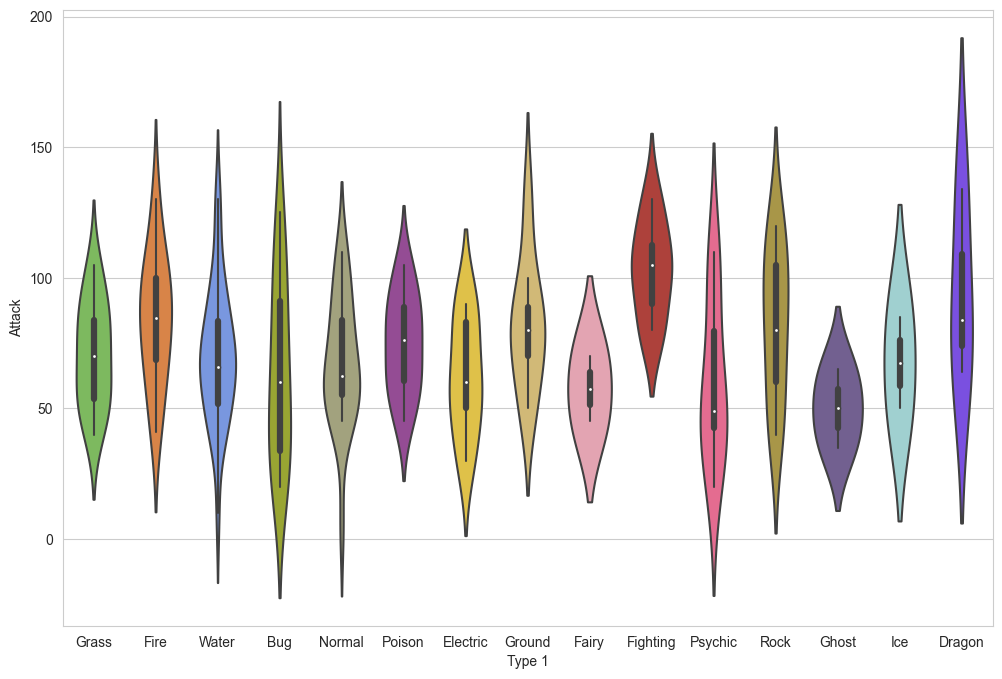

In [15]:
sns.set_style('whitegrid')

# Violin plots
plt.figure(figsize=(12, 8))
sns.violinplot(x='Type 1', 
               y='Attack', 
               data=df, 
               palette=pkmn_type_colors)


<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

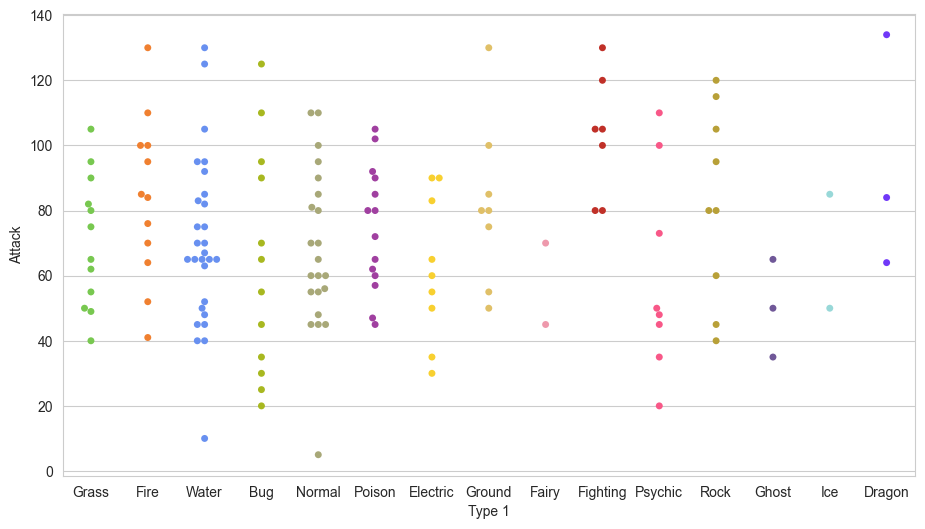

In [16]:
# Swarm plot
plt.figure(figsize=(11,6))
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              palette=pkmn_type_colors)

Text(0.5, 1.0, 'Attack by Type')

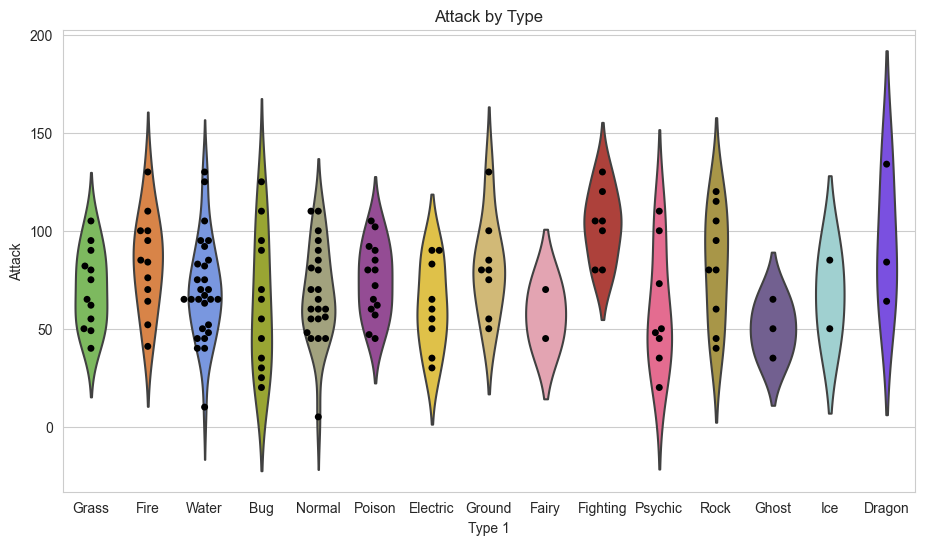

In [20]:
# Making overlaying plots
# OVerlay the swarm on top of violin

plt.figure(figsize=(11,6))

sns.violinplot(x='Type 1', 
               y='Attack', 
               data=df, 
               inner=None, #removes the bars inside the violin plot
               palette=pkmn_type_colors, 
               alpha=0.7)

sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k')

plt.title('Attack by Type')

Currently all of the data is in multiple columns. We can use pd.melt()
It takes 3 variables: 
1. Dataframe to melt
2. ID variables to keep
3. Name for the melted variable

In [21]:
# Melted DF
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Vars to keep 
                    var_name="Stat")

melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [24]:
stats_df.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [25]:
# IT added additional rows for the different combinations of stats
print(stats_df.shape)
print(melted_df.shape)

(151, 9)
(906, 5)


c:\Users\justi\anaconda3\envs\PythonData\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\justi\anaconda3\envs\PythonData\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\justi\anaconda3\envs\PythonData\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\justi\anaconda3\envs\PythonData\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\justi\anaconda3\envs\PythonData

<AxesSubplot:xlabel='Stat', ylabel='value'>

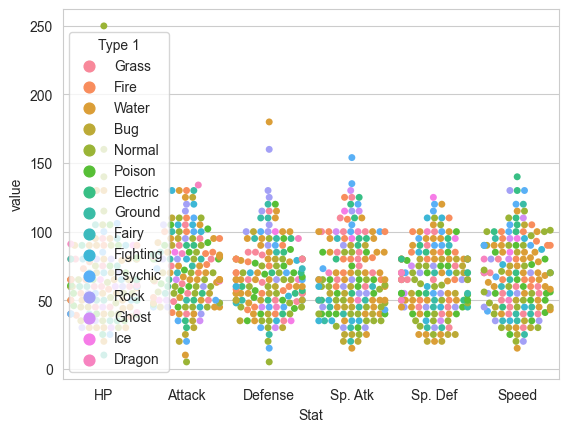

In [26]:
# Create a plot with the stats from the melted
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1')

Now we want to customize this by
1. enlarging the plot
2. separate the points using the hue arg
3. Use the custom color palette
4. Adjust y limits to end at 0
5. put the legend on the right

c:\Users\justi\anaconda3\envs\PythonData\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\justi\anaconda3\envs\PythonData\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\justi\anaconda3\envs\PythonData\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\justi\anaconda3\envs\PythonData\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\justi\anaconda3\envs\PythonData

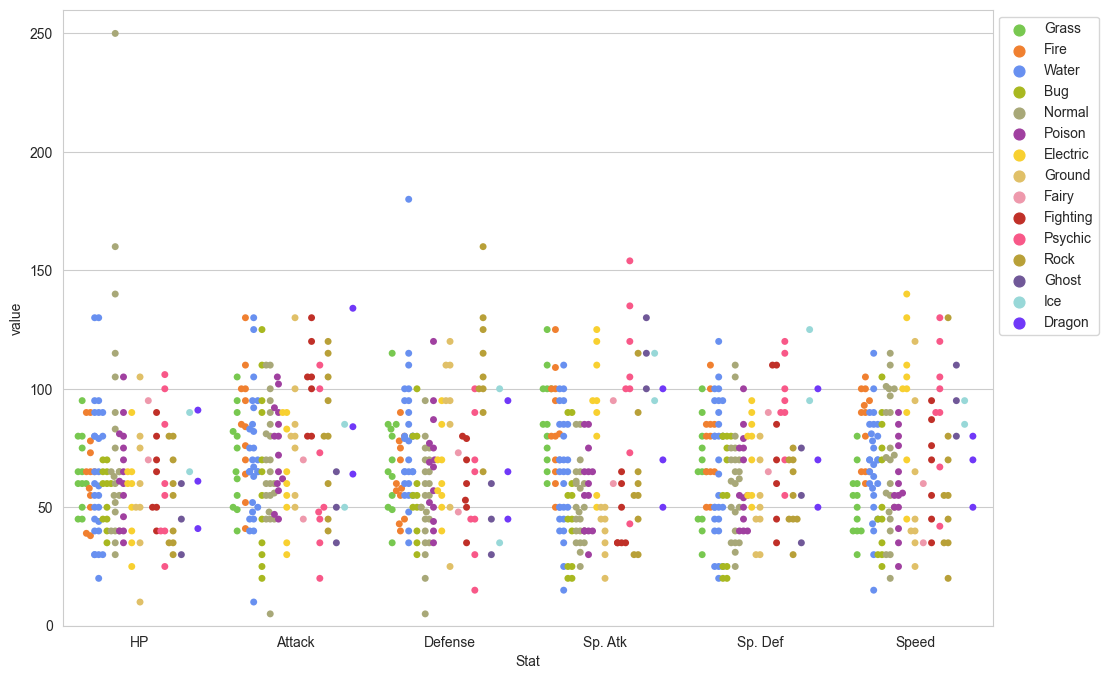

In [27]:
#1. Enlarge the plot
plt.figure(figsize=(12,8))

sns.swarmplot(x='Stat',
              y='value',
              data=melted_df,
              hue='Type 1', 
              dodge=True, # 2. separate points by hue
              palette=pkmn_type_colors) # 3. Use custom colors

# 4. Adjust the y axis
plt.ylim(0, 260)

# 5. Place legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

## Heatmaps
Get the correlation bewtween data and plot the matrix of the correlations


<AxesSubplot:>

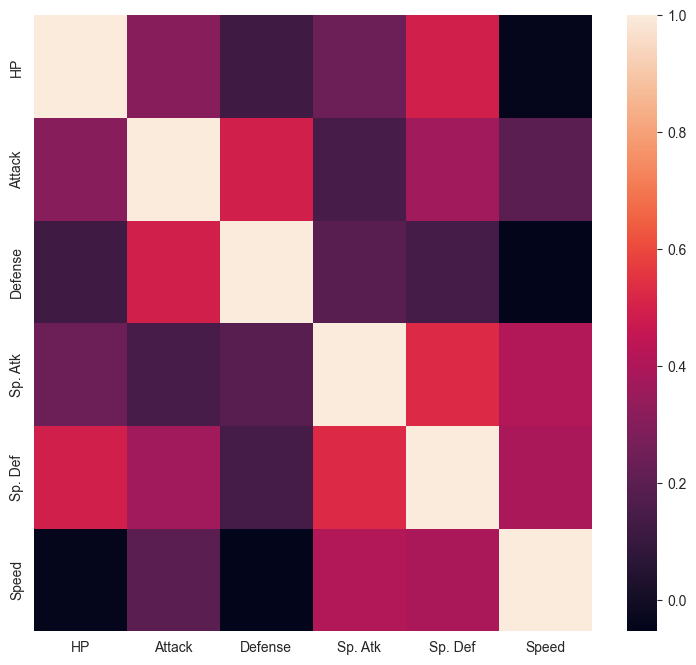

In [28]:
# Calculate correlations
corr = stats_df.corr()

# Heatmap
plt.figure(figsize=(9,8))
sns.heatmap(corr)

## Histograms

<AxesSubplot:xlabel='Attack', ylabel='Count'>

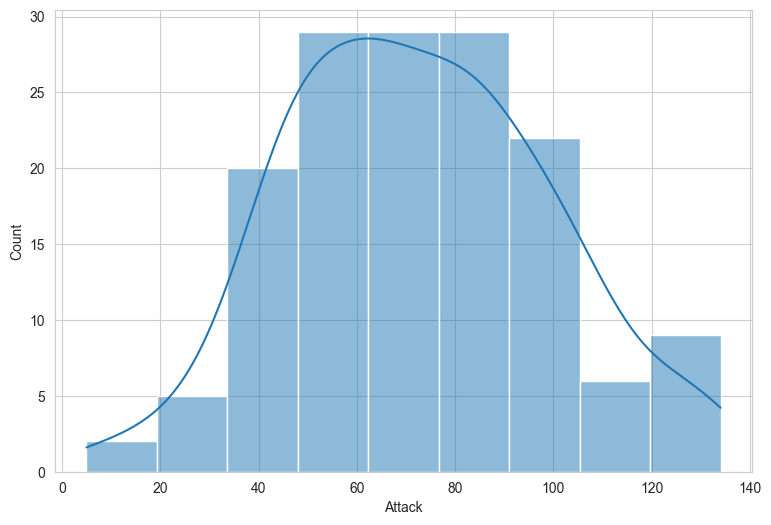

In [29]:
# Distribution plot
plt.figure(figsize=(9,6))
sns.histplot(df, x='Attack', 
             kde=True # this plots the density curve as well 
             )

Bar plot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Poison'),
  Text(6, 0, 'Electric'),
  Text(7, 0, 'Ground'),
  Text(8, 0, 'Fairy'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Psychic'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Ghost'),
  Text(13, 0, 'Ice'),
  Text(14, 0, 'Dragon')])

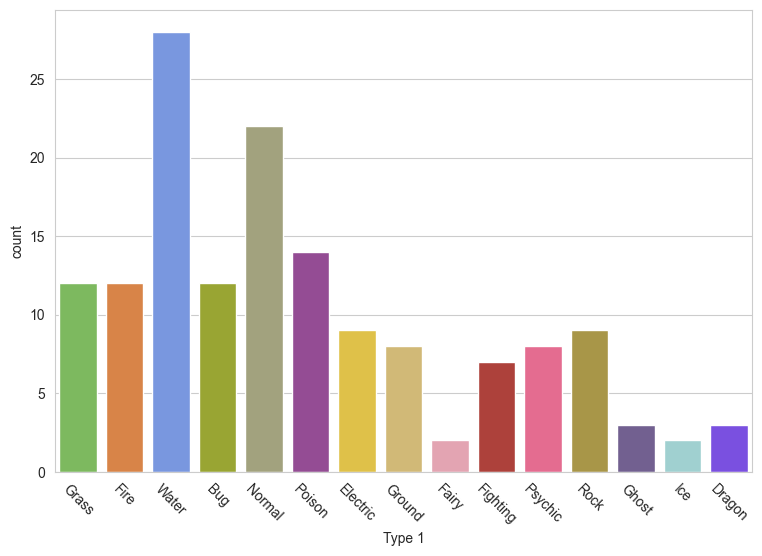

In [31]:
# Count plot/bar plot
plt.figure(figsize=(9,6))
sns.countplot(x='Type 1', 
              data=df, 
              palette=pkmn_type_colors)

# rotate x-labels
plt.xticks(rotation=-45)

## Catplot

Separates by categorical classes

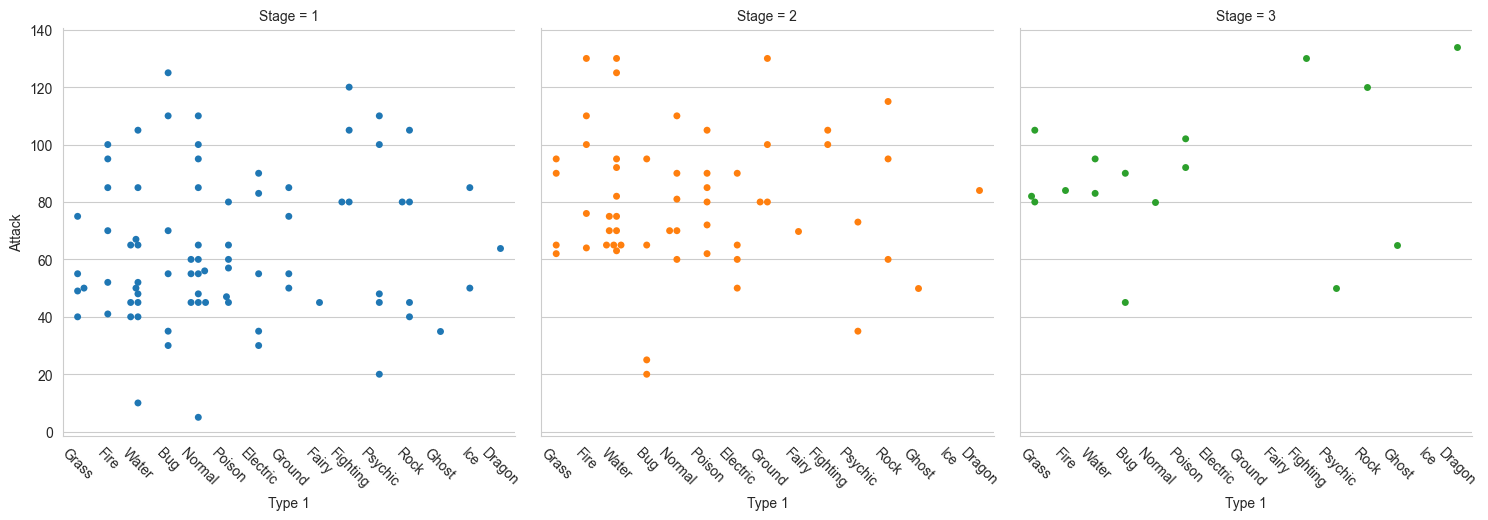

In [32]:
g = sns.catplot(x='Type 1', 
                y='Attack', 
                data=df, 
                hue='Stage', #color by stage 
                col='Stage', # separate by stage
                kind='swarm' # swarmplot type of plot
                )

# Rotate x lables
g.set_xticklabels(rotation=-45)

## Density Plots

Distribution between 2 variables

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

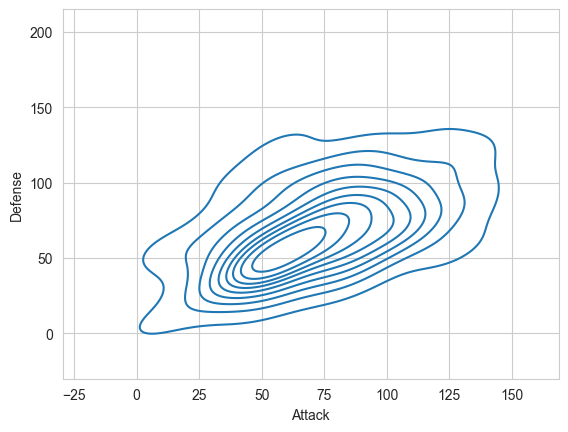

In [33]:
sns.kdeplot(x='Attack', y='Defense', data=df)

## Joint Distribution Plot

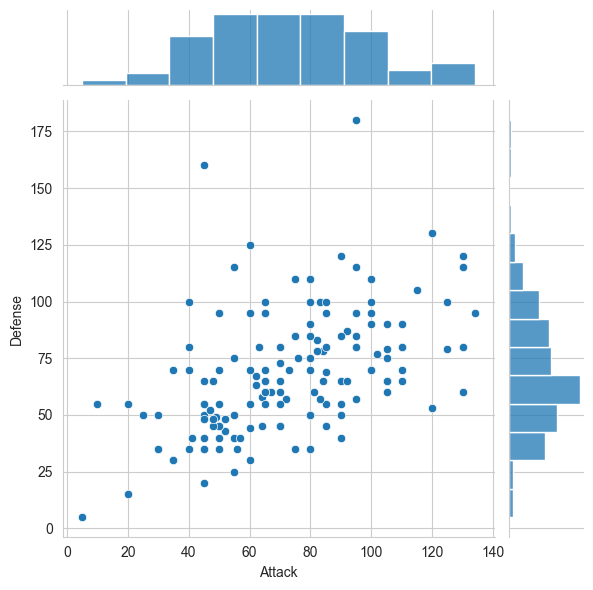

In [35]:
sns.jointplot(x='Attack', y='Defense', data=df)